Converged after 130 epochs.


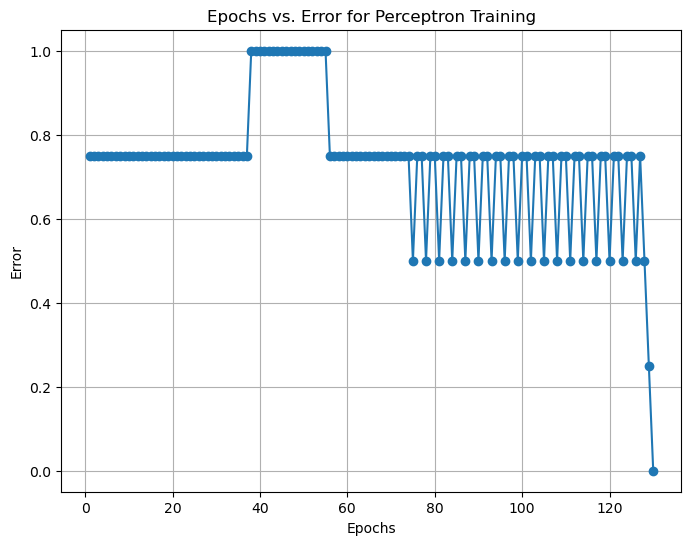

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the AND gate inputs and corresponding outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

# Initialize weights and biases
W = np.array([10, 0.2, -0.75])
learning_rate = 0.05
max_iterations = 1000

# Step activation function
def step_activation(x):
    return np.where(x >= 0, 1, 0)

# Calculate the sum-square-error
def calculate_error(Y, Y_pred):
    return np.sum((Y - Y_pred) ** 2)

# Lists to store error values and epochs
error_values = []
epochs = []

# Training loop
for epoch in range(max_iterations):
    total_error = 0

    for i in range(len(X)):
        # Calculate the predicted output using the current weights
        net_input = np.dot(X[i], W[1:]) + W[0]
        Y_pred = step_activation(net_input)

        # Update weights based on the error
        error = Y[i] - Y_pred
        W[1:] += learning_rate * error * X[i]
        W[0] += learning_rate * error

        total_error += calculate_error(Y[i], Y_pred)

    # Calculate the average error for this epoch
    avg_error = total_error / len(X)
    error_values.append(avg_error)
    epochs.append(epoch + 1)

    # Check for convergence
    if avg_error <= 0.002:
        print(f"Converged after {epoch + 1} epochs.")
        break

# Plot epochs against error values
plt.figure(figsize=(8, 6))
plt.plot(epochs, error_values, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for Perceptron Training')
plt.grid(True)
plt.show()


ReLU converged after 315 epochs.


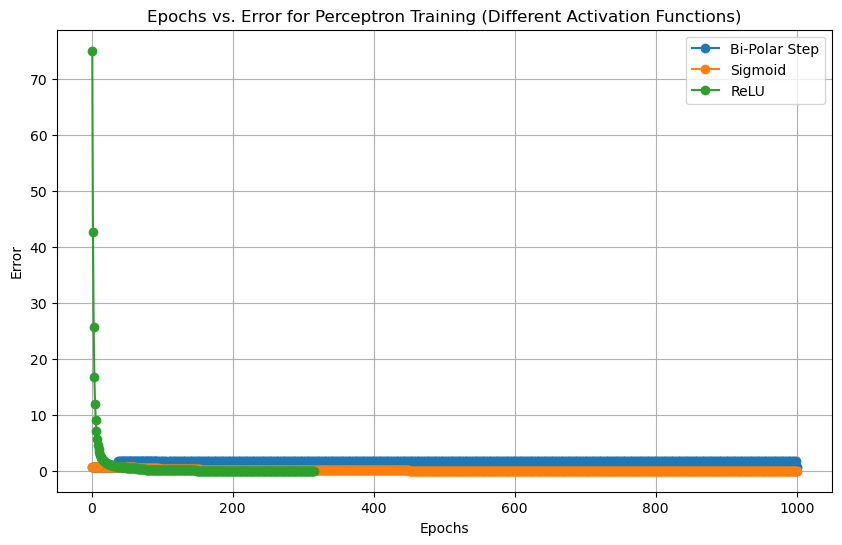

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the AND gate inputs and corresponding outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

# Initialize weights and biases
W = np.array([10, 0.2, -0.75])
learning_rate = 0.05
max_iterations = 1000

# Activation functions
def bipolar_step_activation(x):
    return np.where(x >= 0, 1, -1)

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    return np.maximum(0, x)

# Calculate the sum-square-error
def calculate_error(Y, Y_pred):
    return np.sum((Y - Y_pred) ** 2)

# Lists to store error values and epochs for each activation function
activation_functions = ["Bi-Polar Step", "Sigmoid", "ReLU"]
error_values = {activation: [] for activation in activation_functions}
epochs = {activation: [] for activation in activation_functions}

for activation in activation_functions:
    W = np.array([10, 0.2, -0.75])  # Reset weights for each activation function
    for epoch in range(max_iterations):
        total_error = 0

        for i in range(len(X)):
            # Calculate the predicted output using the current weights
            net_input = np.dot(X[i], W[1:]) + W[0]
            
            if activation == "Bi-Polar Step":
                Y_pred = bipolar_step_activation(net_input)
            elif activation == "Sigmoid":
                Y_pred = sigmoid_activation(net_input)
            elif activation == "ReLU":
                Y_pred = relu_activation(net_input)

            # Update weights based on the error
            error = Y[i] - Y_pred
            W[1:] += learning_rate * error * X[i]
            W[0] += learning_rate * error

            total_error += calculate_error(Y[i], Y_pred)

        # Calculate the average error for this epoch
        avg_error = total_error / len(X)
        error_values[activation].append(avg_error)
        epochs[activation].append(epoch + 1)

        # Check for convergence
        if avg_error <= 0.002:
            print(f"{activation} converged after {epoch + 1} epochs.")
            break

# Plot epochs against error values for each activation function
plt.figure(figsize=(10, 6))
for activation in activation_functions:
    plt.plot(epochs[activation], error_values[activation], marker='o', label=activation)

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for Perceptron Training (Different Activation Functions)')
plt.legend()
plt.grid(True)
plt.show()


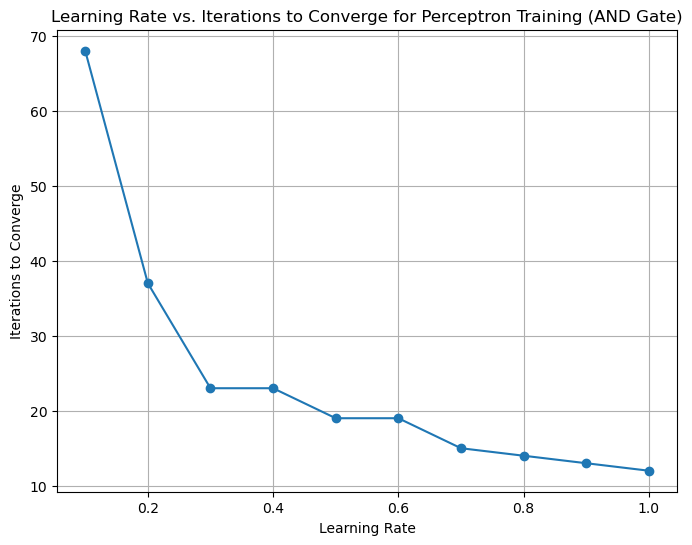

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the AND gate inputs and corresponding outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

# Initialize weights
W = np.array([10, 0.2, -0.75])

# Create a list of learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize lists to store the number of iterations for each learning rate
iterations_to_converge = []

# Maximum number of iterations for each learning rate
max_iterations = 1000

# Training loop for each learning rate
for learning_rate in learning_rates:
    W = np.array([10, 0.2, -0.75])  # Reset weights for each learning rate
    for iteration in range(max_iterations):
        total_error = 0

        for i in range(len(X)):
            # Calculate the predicted output using the current weights
            net_input = np.dot(X[i], W[1:]) + W[0]
            Y_pred = np.where(net_input >= 0, 1, 0)

            # Update weights based on the error
            error = Y[i] - Y_pred
            W[1:] += learning_rate * error * X[i]
            W[0] += learning_rate * error

            total_error += abs(error)

        # Check for convergence
        if total_error == 0:
            iterations_to_converge.append(iteration + 1)
            break

# Plot learning rates vs. number of iterations to converge
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Learning Rate vs. Iterations to Converge for Perceptron Training (AND Gate)')
plt.grid(True)
plt.show()


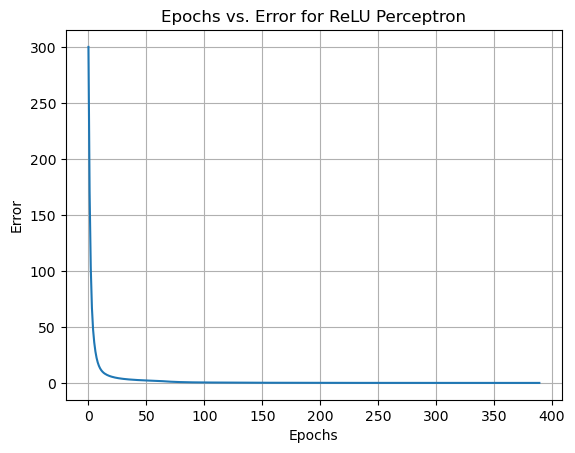

Learned Weights: W0 = -0.9277447198109581, W1 = 0.9511600082912268, W2 = 0.9498108559260638


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate input 
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# AND gate output 
y = np.array([0, 0, 0, 1])

#  weights and bias
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

#  ReLU activation function
def relu_activation(z):
    return max(0, z)

#  variables for tracking epochs and errors
epochs = 0
errors = []

while True:
    error_sum = 0
    for i in range(len(X)):
        xi = X[i]
        target = y[i]
        
        #  the weighted sum
        z = W0 + W1 * xi[0] + W2 * xi[1]
        
        #  the predicted output
        predicted = relu_activation(z)
        
        #  the error
        error = target - predicted
        error_sum += error ** 2
        
        # Update weights and bias
        W0 += learning_rate * error
        W1 += learning_rate * error * xi[0]
        W2 += learning_rate * error * xi[1]
    
    epochs += 1
    errors.append(error_sum)
    
    # Check for convergence condition or maximum epochs
    if error_sum <= 0.002 or epochs >= 1000:
        break

# Plot epochs vs. error values
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for ReLU Perceptron')
plt.grid(True)
plt.show()

# Print the learned weights and bias
print(f"Learned Weights: W0 = {W0}, W1 = {W1}, W2 = {W2}")


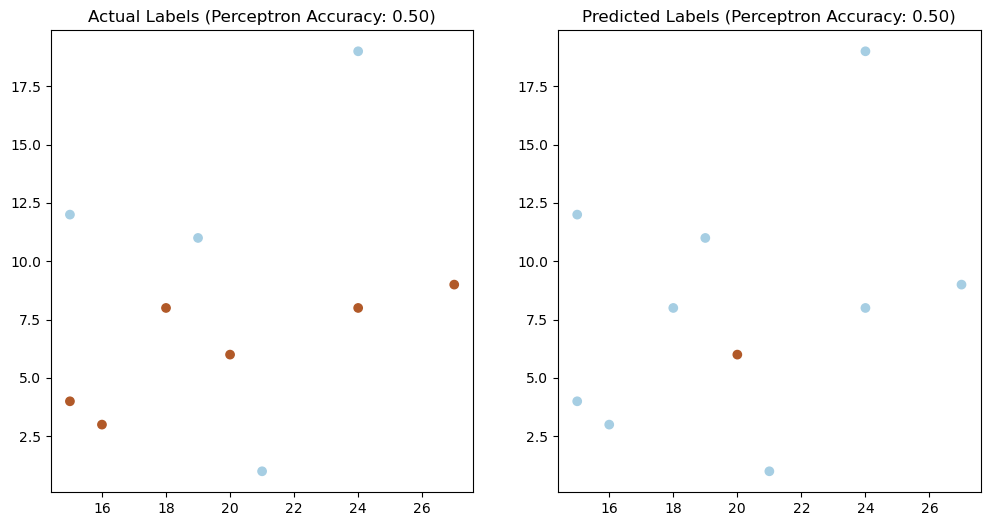

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Input features (Candies, Mangoes, Milk Packets)
X = np.array([
    [20, 6, 1],
    [16, 3, 2],
    [27, 9, 3],
    [19, 11, 0],
    [24, 8, 2],
    [15, 12, 1],
    [15, 4, 2],
    [18, 8, 2],
    [21, 1, 4],
    [24, 19, 8]
])

# Corresponding target labels (High Value Tx)
y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Create and train a perceptron model
class Perceptron:
    def __init__(self, learning_rate=0.05, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = self.step_function(linear_output)

                # Update weights and bias
                self.weights += self.learning_rate * (y[i] - prediction) * X[i]
                self.bias += self.learning_rate * (y[i] - prediction)

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            linear_output = np.dot(X[i], self.weights) + self.bias
            predictions.append(self.step_function(linear_output))
        return np.array(predictions)

perceptron = Perceptron()
perceptron.fit(X, y)

# Create and train a logistic regression model
logistic_regression = LogisticRegression(solver='lbfgs')
logistic_regression.fit(X, y)

# Generate predictions for each transaction
perceptron_predictions = perceptron.predict(X)
logistic_regression_predictions = logistic_regression.predict(X)

# Calculate accuracy for both models
perceptron_accuracy = accuracy_score(y, perceptron_predictions)
logistic_regression_accuracy = accuracy_score(y, logistic_regression_predictions)

# Plot transactions with actual and predicted labels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title(f'Actual Labels (Perceptron Accuracy: {perceptron_accuracy:.2f})')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=perceptron_predictions, cmap=plt.cm.Paired)
plt.title(f'Predicted Labels (Perceptron Accuracy: {perceptron_accuracy:.2f})')

plt.show()

In [16]:
import numpy as np

# Define the customer data and corresponding labels
data = np.array([
    [12, 5, 3, 2086, 1],   # High Value
    [21, 6, 2, 2889, 1],   # High Value
    [32, 7, 3, 2393, 1],   # High Value
    [19, 11, 0, 2110, 0],  # Low Value
    [24, 5, 4, 2280, 1],   # High Value
    [22, 15, 1, 5167, 0],  # Low Value
    [15, 4, 2, 2671, 1],   # High Value
    [18, 4, 2, 2274, 1],   # High Value
    [21, 14, 1, 4148, 0],  # Low Value
    [16, 24, 1, 9198, 0]   # Low Value
])

# Separate features and labels
X = data[:, :-1]
Y = data[:, -1]

# Use matrix pseudo-inverse to find optimal weights
X_pseudo_inverse = np.linalg.pinv(X)
weights_pseudo_inverse = np.dot(X_pseudo_inverse, Y)

# Classify transactions based on the weights obtained from the pseudo-inverse
def classify_transaction_pseudo_inverse(candies, mangoes, milk_packets, payment):
    input_data = np.array([candies, mangoes, milk_packets, payment])
    net_input = np.dot(input_data, weights_pseudo_inverse)
    predicted_output = 1 if net_input >= 0.5 else 0
    return "High Value" if predicted_output == 1 else "Low Value"

# Test some sample transactions using the pseudo-inverse weights
transactions = [
    (10, 5, 2, 2000),
    (30, 10, 1, 4000),
    (5, 1, 4, 1000)
]

for transaction in transactions:
    candies, mangoes, milk_packets, payment = transaction
    classification = classify_transaction_pseudo_inverse(candies, mangoes, milk_packets, payment)
    print(f"Transaction: Candies={candies}, Mangoes={mangoes}, Milk Packets={milk_packets}, Payment={payment} -> {classification}")


Transaction: Candies=10, Mangoes=5, Milk Packets=2, Payment=2000 -> Low Value
Transaction: Candies=30, Mangoes=10, Milk Packets=1, Payment=4000 -> High Value
Transaction: Candies=5, Mangoes=1, Milk Packets=4, Payment=1000 -> High Value


In [17]:
import numpy as np

# Define the AND gate inputs and corresponding outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

# Initialize weights and biases randomly
input_size = 2
hidden_size = 2
output_size = 1

np.random.seed(0)
weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))
bias_output = np.zeros((1, output_size))

# Define hyperparameters
learning_rate = 0.05
max_iterations = 1000
convergence_threshold = 0.002

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop
for iteration in range(max_iterations):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Calculate the error
    error = Y.reshape(Y.shape[0], 1) - predicted_output

    # Check for convergence
    if np.mean(np.abs(error)) <= convergence_threshold:
        print(f"Converged after {iteration + 1} iterations.")
        break

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Test the network
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_outputs = sigmoid(sigmoid(test_inputs.dot(weights_input_hidden) + bias_hidden).dot(weights_hidden_output) + bias_output)
print("Test Outputs:")
print(predicted_outputs)


Test Outputs:
[[0.23327416]
 [0.29609331]
 [0.30368578]
 [0.36311458]]


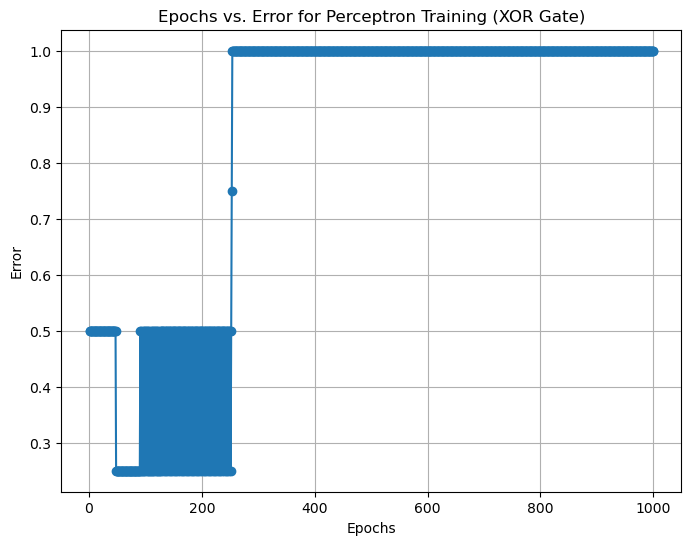

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the XOR gate inputs and corresponding outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

# Initialize weights and biases
W = np.array([10, 0.2, -0.75])
learning_rate = 0.05
max_iterations = 1000

# Step activation function
def step_activation(x):
    return np.where(x >= 0, 1, 0)

# Calculate the sum-square-error
def calculate_error(Y, Y_pred):
    return np.sum((Y - Y_pred) ** 2)

# Lists to store error values and epochs
error_values = []
epochs = []

# Training loop
for epoch in range(max_iterations):
    total_error = 0

    for i in range(len(X)):
        # Calculate the predicted output using the current weights
        net_input = np.dot(X[i], W[1:]) + W[0]
        Y_pred = step_activation(net_input)

        # Update weights based on the error
        error = Y[i] - Y_pred
        W[1:] += learning_rate * error * X[i]
        W[0] += learning_rate * error

        total_error += calculate_error(Y[i], Y_pred)

    # Calculate the average error for this epoch
    avg_error = total_error / len(X)
    error_values.append(avg_error)
    epochs.append(epoch + 1)

    # Check for convergence
    if avg_error <= 0.002:
        print(f"Converged after {epoch + 1} epochs.")
        break

# Plot epochs against error values
plt.figure(figsize=(8, 6))
plt.plot(epochs, error_values, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for Perceptron Training (XOR Gate)')
plt.grid(True)
plt.show()


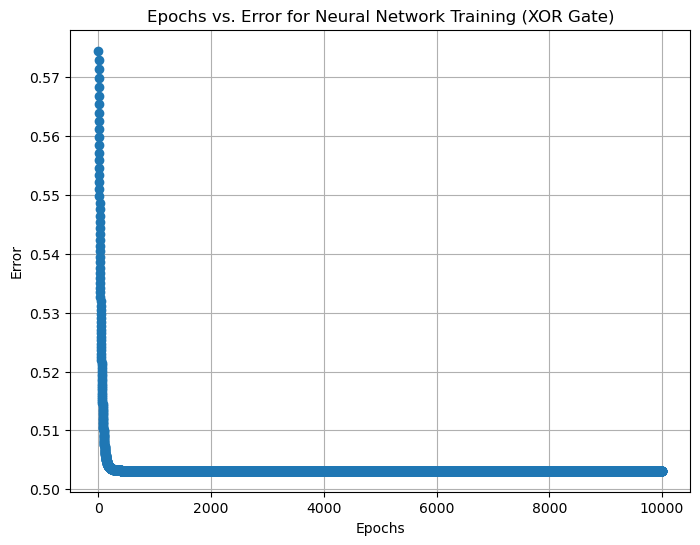

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the XOR gate inputs and corresponding outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # Mapping: 0 -> [1, 0], 1 -> [0, 1]

# Initialize weights and biases
input_size = 2
output_size = 2
W = np.random.rand(input_size, output_size)
learning_rate = 0.1
max_iterations = 10000

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Calculate the sum-square-error
def calculate_error(Y, Y_pred):
    return np.sum((Y - Y_pred) ** 2)

# Lists to store error values and epochs
error_values = []
epochs = []

# Training loop
for epoch in range(max_iterations):
    total_error = 0

    for i in range(len(X)):
        # Forward propagation
        input_layer = X[i]
        output_layer_input = np.dot(input_layer, W)
        output_layer_output = sigmoid(output_layer_input)

        # Calculate the error
        error = Y[i] - output_layer_output

        # Backpropagation
        d_output_layer = error * sigmoid_derivative(output_layer_output)
        W += learning_rate * np.outer(input_layer, d_output_layer)

        total_error += calculate_error(Y[i], output_layer_output)

    # Calculate the average error for this epoch
    avg_error = total_error / len(X)
    error_values.append(avg_error)
    epochs.append(epoch + 1)

    # Check for convergence
    if avg_error <= 0.002:
        print(f"Converged after {epoch + 1} epochs.")
        break

# Plot epochs against error values
plt.figure(figsize=(8, 6))
plt.plot(epochs, error_values, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for Neural Network Training (XOR Gate)')
plt.grid(True)
plt.show()


In [27]:
from sklearn.neural_network import MLPClassifier

# Define the AND gate inputs and corresponding outputs
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 0, 0, 1]

# Create an MLPClassifier model
model = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.05, max_iter=1000)

# Train the model
model.fit(X, Y)

# Predict outputs
predictions = model.predict(X)

# Print predictions
print("Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Actual: {Y[i]}, Predicted: {predictions[i]}")
    
from sklearn.neural_network import MLPClassifier

# Define the XOR gate inputs and corresponding outputs
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 0]

# Create an MLPClassifier model
model = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.05, max_iter=1000)

# Train the model
model.fit(X, Y)

# Predict outputs
predictions = model.predict(X)

# Print predictions
print("Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Actual: {Y[i]}, Predicted: {predictions[i]}")


Predictions:
Input: [0, 0], Actual: 0, Predicted: 0
Input: [0, 1], Actual: 0, Predicted: 0
Input: [1, 0], Actual: 0, Predicted: 0
Input: [1, 1], Actual: 1, Predicted: 1
Predictions:
Input: [0, 0], Actual: 0, Predicted: 0
Input: [0, 1], Actual: 1, Predicted: 0
Input: [1, 0], Actual: 1, Predicted: 1
Input: [1, 1], Actual: 0, Predicted: 0


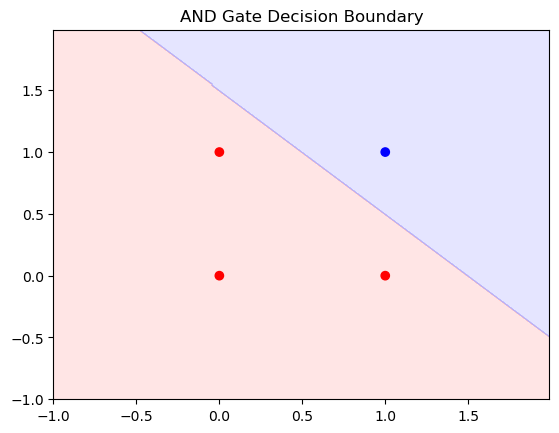

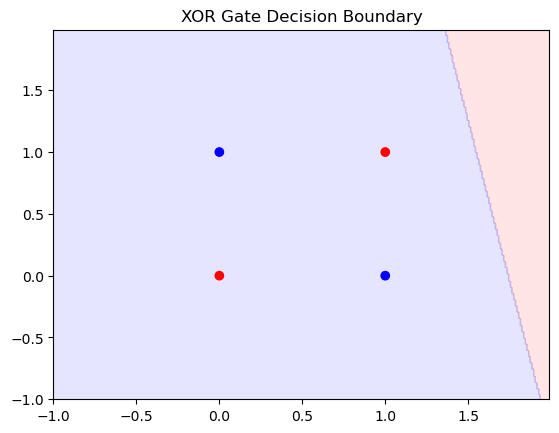

AND Gate Accuracy: 1.0
XOR Gate Accuracy: 0.5


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Define the AND gate input and output data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Define the XOR gate input and output data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create an MLPClassifier for the AND gate
and_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.1, max_iter=10000)

# Create an MLPClassifier for the XOR gate
xor_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.1, max_iter=10000)

# Train the AND gate classifier
and_classifier.fit(X_and, y_and)

# Train the XOR gate classifier
xor_classifier.fit(X_xor, y_xor)

# Predict for AND gate inputs
and_predictions = and_classifier.predict(X_and)

# Predict for XOR gate inputs
xor_predictions = xor_classifier.predict(X_xor)

# Confusion matrix for AND gate
cm_and = confusion_matrix(y_and, and_predictions)

# Confusion matrix for XOR gate
cm_xor = confusion_matrix(y_xor, xor_predictions)

# Define a function to plot the decision boundary
def plot_decision_boundary(classifier, X, y, title):
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundary for AND gate
plot_decision_boundary(and_classifier, X_and, y_and, "AND Gate Decision Boundary")

# Plot decision boundary for XOR gate
plot_decision_boundary(xor_classifier, X_xor, y_xor, "XOR Gate Decision Boundary")

# Calculate accuracy for AND and XOR gates
accuracy_and = accuracy_score(y_and, and_predictions)
accuracy_xor = accuracy_score(y_xor, xor_predictions)

print("AND Gate Accuracy:", accuracy_and)
print("XOR Gate Accuracy:", accuracy_xor)
